In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import numpy as np

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the primary dataset 
netflix_path = "netflix_shows.csv"
netflix_data = pd.read_csv(netflix_path)

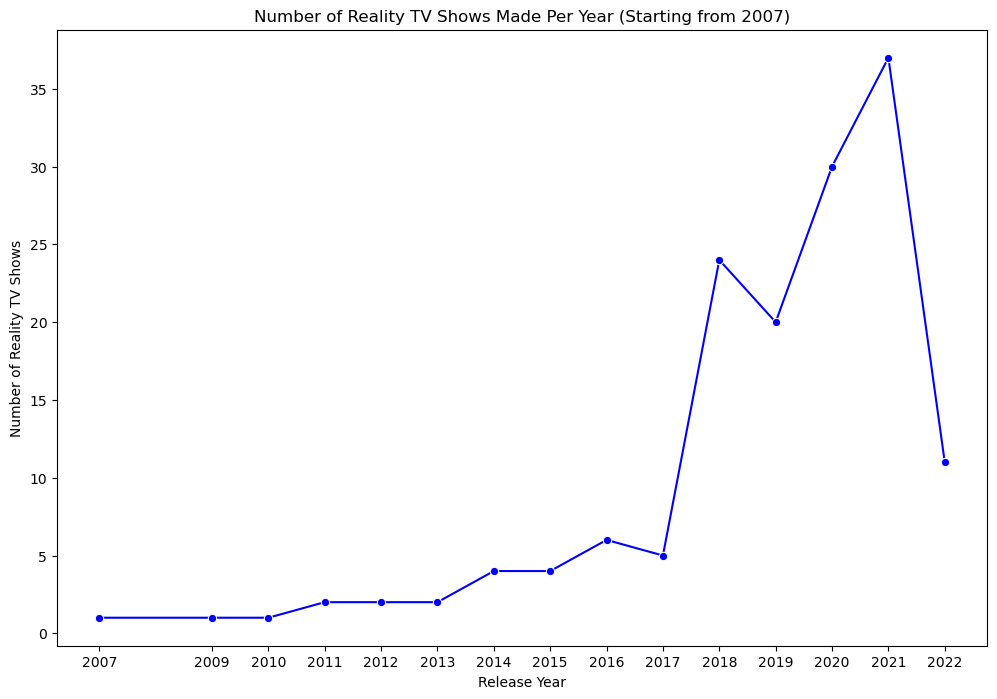

In [2]:
# Filter shows released from 2007 onwards
netflix_shows = netflix_data[(netflix_data['release_year'] >= 2007)].dropna().reset_index(drop=True)

# Filter shows with the 'reality' genre
reality_shows = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Count the number of reality shows per year
reality_shows_per_year = reality_shows.groupby('release_year').size().reset_index(name='num_shows')

plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='num_shows', data=reality_shows_per_year, marker='o', color='blue')

# Adding labels and title
plt.title('Number of Reality TV Shows Made Per Year (Starting from 2007)')
plt.xlabel('Release Year')
plt.ylabel('Number of Reality TV Shows')
plt.xticks(reality_shows_per_year['release_year'])
plt.grid(False)

# Display the plot
plt.show()


In [3]:
#The line plot with markers shows the number of reality TV shows produced each year, starting from 2010.
#The count of reality shows has generally increased over the years, with a noticeable peak around 2020.
#The increasing trend in the number of reality TV shows suggests a growing audience interest in this genre.

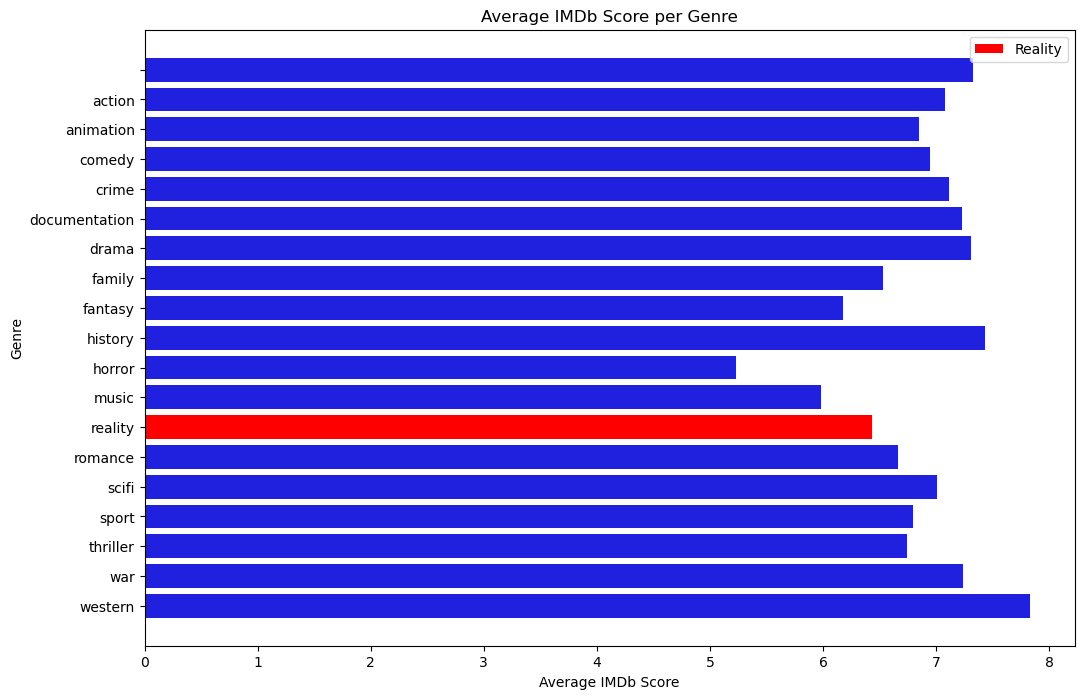

In [4]:
# Extract the first genre from the list of genres
netflix_shows['primary_genre'] = netflix_shows['genres'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) and ast.literal_eval(x) else '')

# Group by genre and calculate the average IMDb score
genre_avg_imdb = netflix_shows.groupby('primary_genre')['imdb_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='imdb_score', y='primary_genre', data=genre_avg_imdb, color='b')

# Set labels and title
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Average IMDb Score per Genre')

reality_index = genre_avg_imdb[genre_avg_imdb['primary_genre'] == 'reality'].index[0]
plt.barh(reality_index, genre_avg_imdb.loc[reality_index, 'imdb_score'], color='r', label='Reality')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [5]:
#The code extracted the primary genre from the list of genres for each TV show.
#Bar chart was created to visualize the average IMDb score for each genre.
#In the bar chart, genres are represented by bars.
#The analysis provides insights into the average IMDb scores for different genres, helping understand audience perceptions.

In [20]:
# Split the DataFrame into reality and other genres
reality_data = netflix_shows[netflix_shows['genres'].str.contains('reality', case=False, na=False)]
other_data = netflix_shows[~netflix_shows['genres'].str.contains('reality', case=False, na=False)]

# Perform a t-test
t_statistic, p_value = ttest_ind(reality_data['imdb_score'].dropna(), other_data['imdb_score'].dropna(), equal_var=False)

print("Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. ")
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference. Therefore we reject our null hypothesis.")
else:
    print("There is no significant difference. Therefore we accept our null hypothesis.")
    


Null hypothesis: The average IMDb score for the genre of reality tv is not significantly different to the average IMDb score of other genres. 
T-statistic: -5.958724175034223
P-value: 1.4171989774899512e-08
There is a significant difference. Therefore we reject our null hypothesis.


In [ ]:
#A hypothesis test was conducted to compare the IMDb scores of reality TV shows with those of other genres on Netflix.
#The test results, including the T-statistic and P-value, revealed a significant difference in IMDb scores between reality TV and other genres.
#The analysis suggests that reality TV shows, on average, have significantly different IMDb scores compared to other genres. The significance level (alpha) was set at 0.05.